In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('file:///C:/Users/prakash/Documents/MACHINE%20LEARNING/FINAL%20PROJECTS/CAMPUS%20X/book%20recommendation%20clustering/spam.csv',encoding="ISO-8859-1")

# Preprocessing

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.shape

(5572, 5)

In [6]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### rename the columns

In [7]:
data=data.rename(columns={'v1':'target','v2':'text'})
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
data.target=encoder.fit_transform(data.target)
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
data.duplicated().sum()

403

In [13]:
data=data.drop_duplicates(keep='first')
data.shape

(5169, 2)

# EDA

In [14]:
data.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

In [15]:
import matplotlib.pyplot as plt

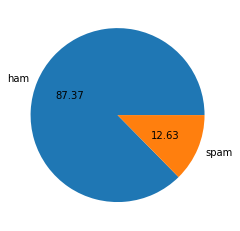

In [16]:
plt.pie(data.target.value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [17]:
# imbalance

# text data analysis

In [18]:
import nltk

In [19]:
data['num_characters']=data.text.apply(len)

In [20]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


##### number of words

In [21]:
data['num_words']=data.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
data['num_sentences']=data.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
data[['num_characters','num_words',"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
# ham
data[data.target==0][['num_characters','num_words',"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# spam
data[data.target==1][['num_characters','num_words',"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [28]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

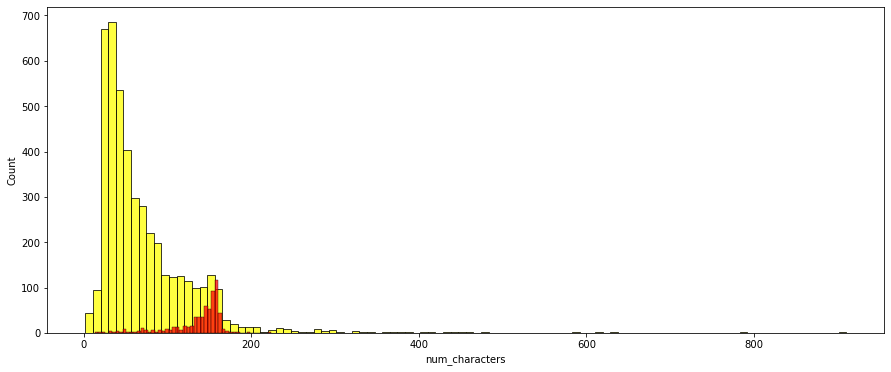

In [29]:
plt.figure(figsize=(15,6))
sns.histplot(data[data.target==0]['num_characters'],bins=100,color='yellow')
sns.histplot(data[data.target==1]['num_characters'],bins=50,color='red')

<AxesSubplot:>

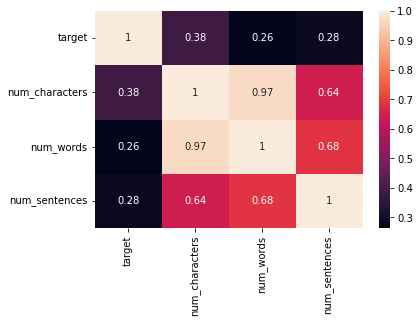

In [30]:
sns.heatmap(data.corr(),annot=True)

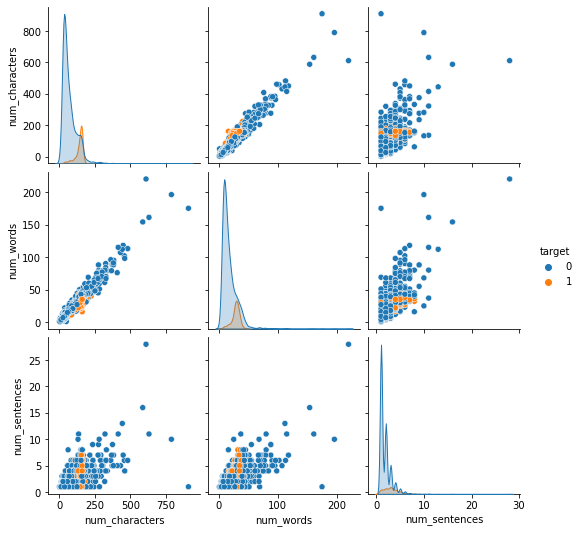

In [31]:
sns.pairplot(data,hue='target')

# Data Preprocessing

In [32]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [33]:
def transform_text(text):
    # step 1
    text=text.lower()
    
    # step 2
    text=nltk.word_tokenize(text)
    
    #step 3
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # step 4
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # step 5
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [34]:
#STEP 1

In [35]:
transform_text('Hi, How Are You  Prakash Pacharne?')

'hi prakash pacharn'

In [36]:
#STEP 2

In [37]:
nltk.word_tokenize('Hi, How Are You ?')

['Hi', ',', 'How', 'Are', 'You', '?']

In [38]:
#STEP 3

In [39]:
# use isalnum() method

In [40]:
#STEP 4

In [41]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
#STEP 5

In [43]:
ps.stem('dancing')

'danc'

In [44]:
data.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [46]:
data['transformed_text']=data['text'].apply(transform_text)

In [47]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud

In [49]:
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [50]:
spam_wc=wc.generate(data[data.target==1]['transformed_text'].str.cat(sep=' '))

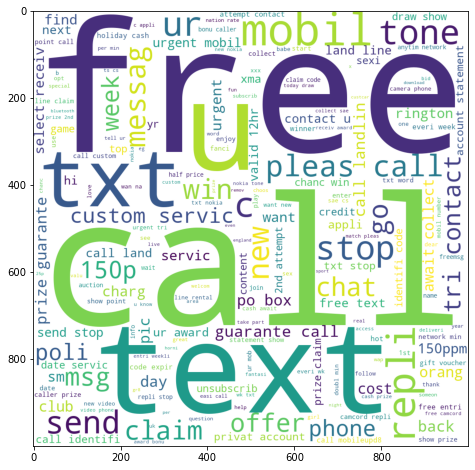

In [51]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

In [52]:
ham_wc=wc.generate(data[data.target==0]['transformed_text'].str.cat(sep=' '))

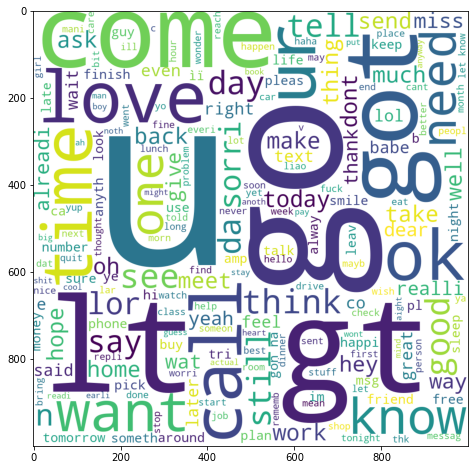

In [53]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.show()

In [54]:
# for spam
spam_corpus=[]
for msg in data[data.target==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [56]:
len(spam_corpus)

9939

In [57]:
# above output means that there are 9939 count of spam words are in spam message

In [58]:
from collections import Counter

In [59]:
# each spam word count 
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [60]:
# getting top 100 spam words
Counter(spam_corpus).most_common(100)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30),
 ('150ppm', 29),
 ('video', 29),
 ('1', 28),
 ('voucher', 28),
 ('code', 27),
 ('holiday', 27),
 ('rate', 26),
 ('network', 26),
 ('select', 26),
 ('150p', 26),
 ('date', 26),
 ('box', 26),
 ('day', 26),
 ('everi', 26),
 ('app

C:\Users\prakash\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


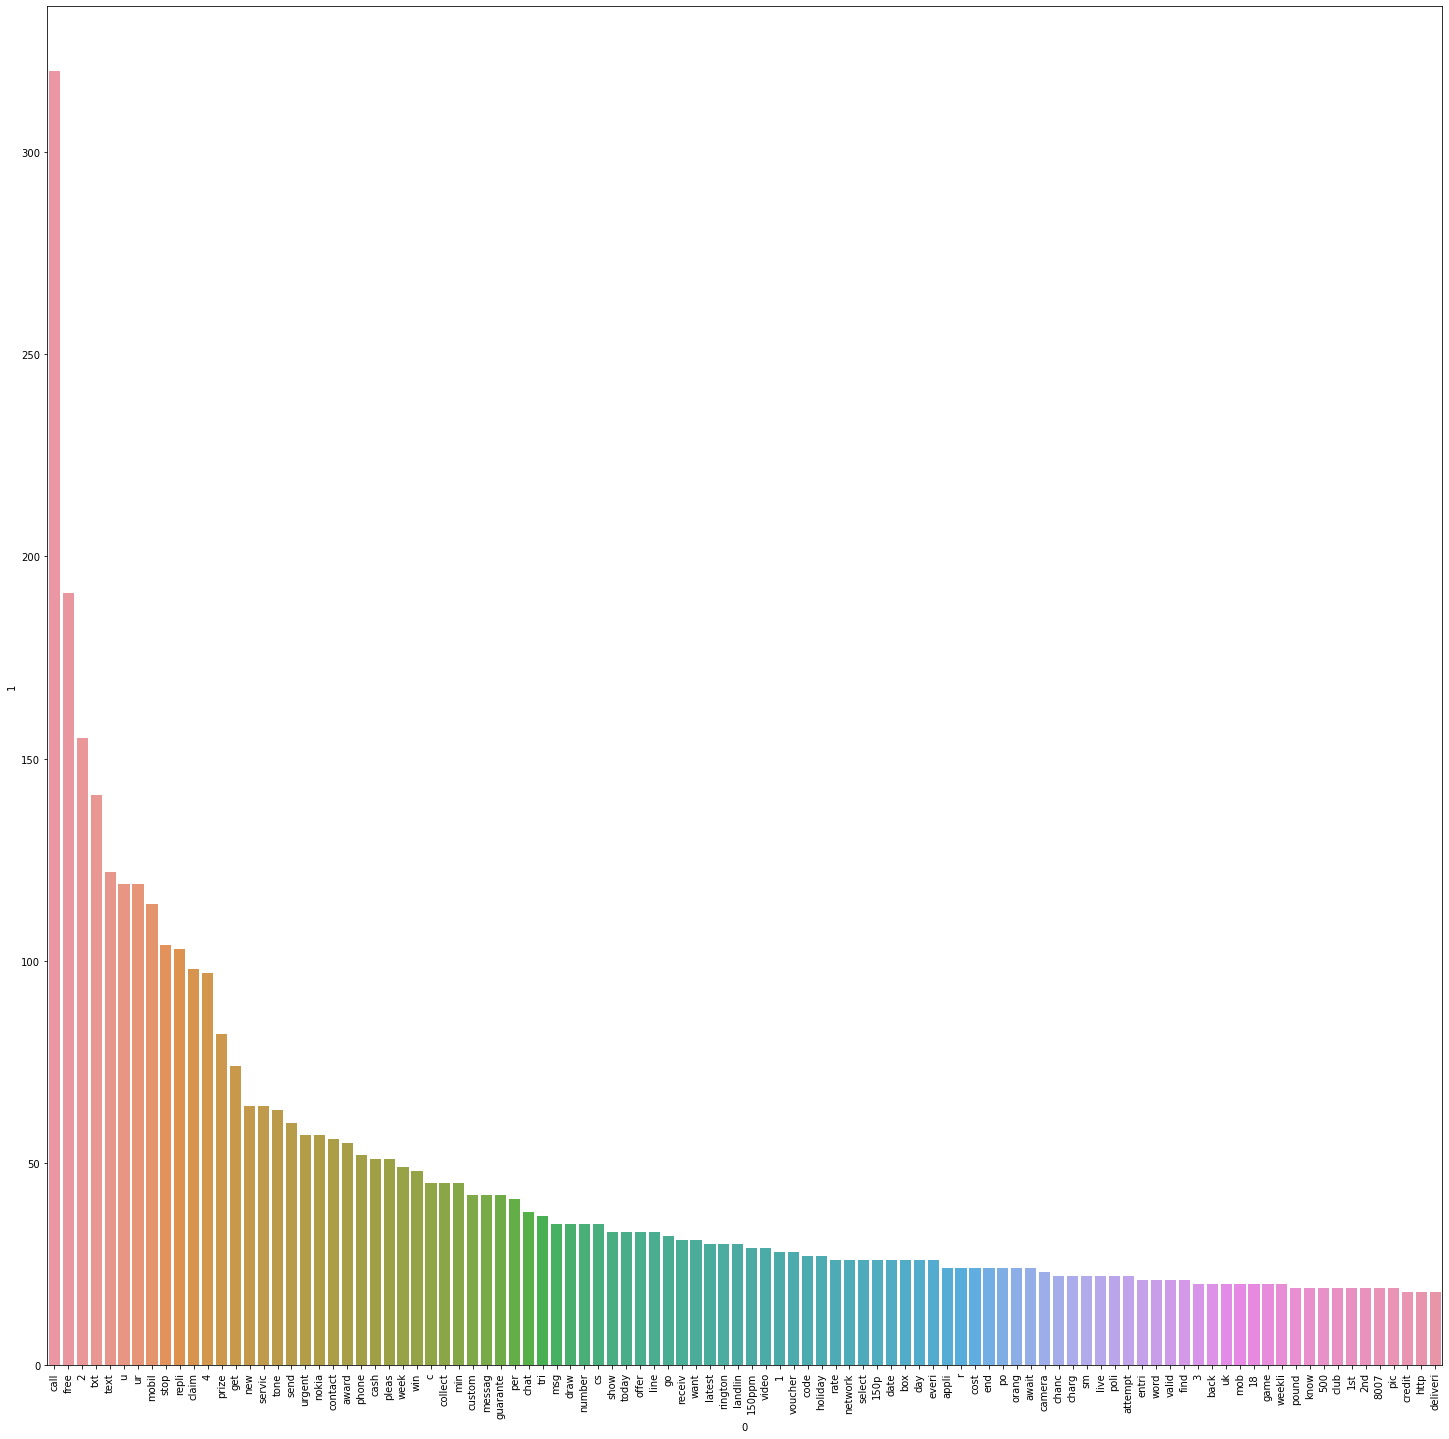

In [61]:
plt.figure(figsize=(25,25))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(100))[0],pd.DataFrame(Counter(spam_corpus).most_common(100))[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# for ham
ham_corpus=[]
for msg in data[data.target==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

C:\Users\prakash\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


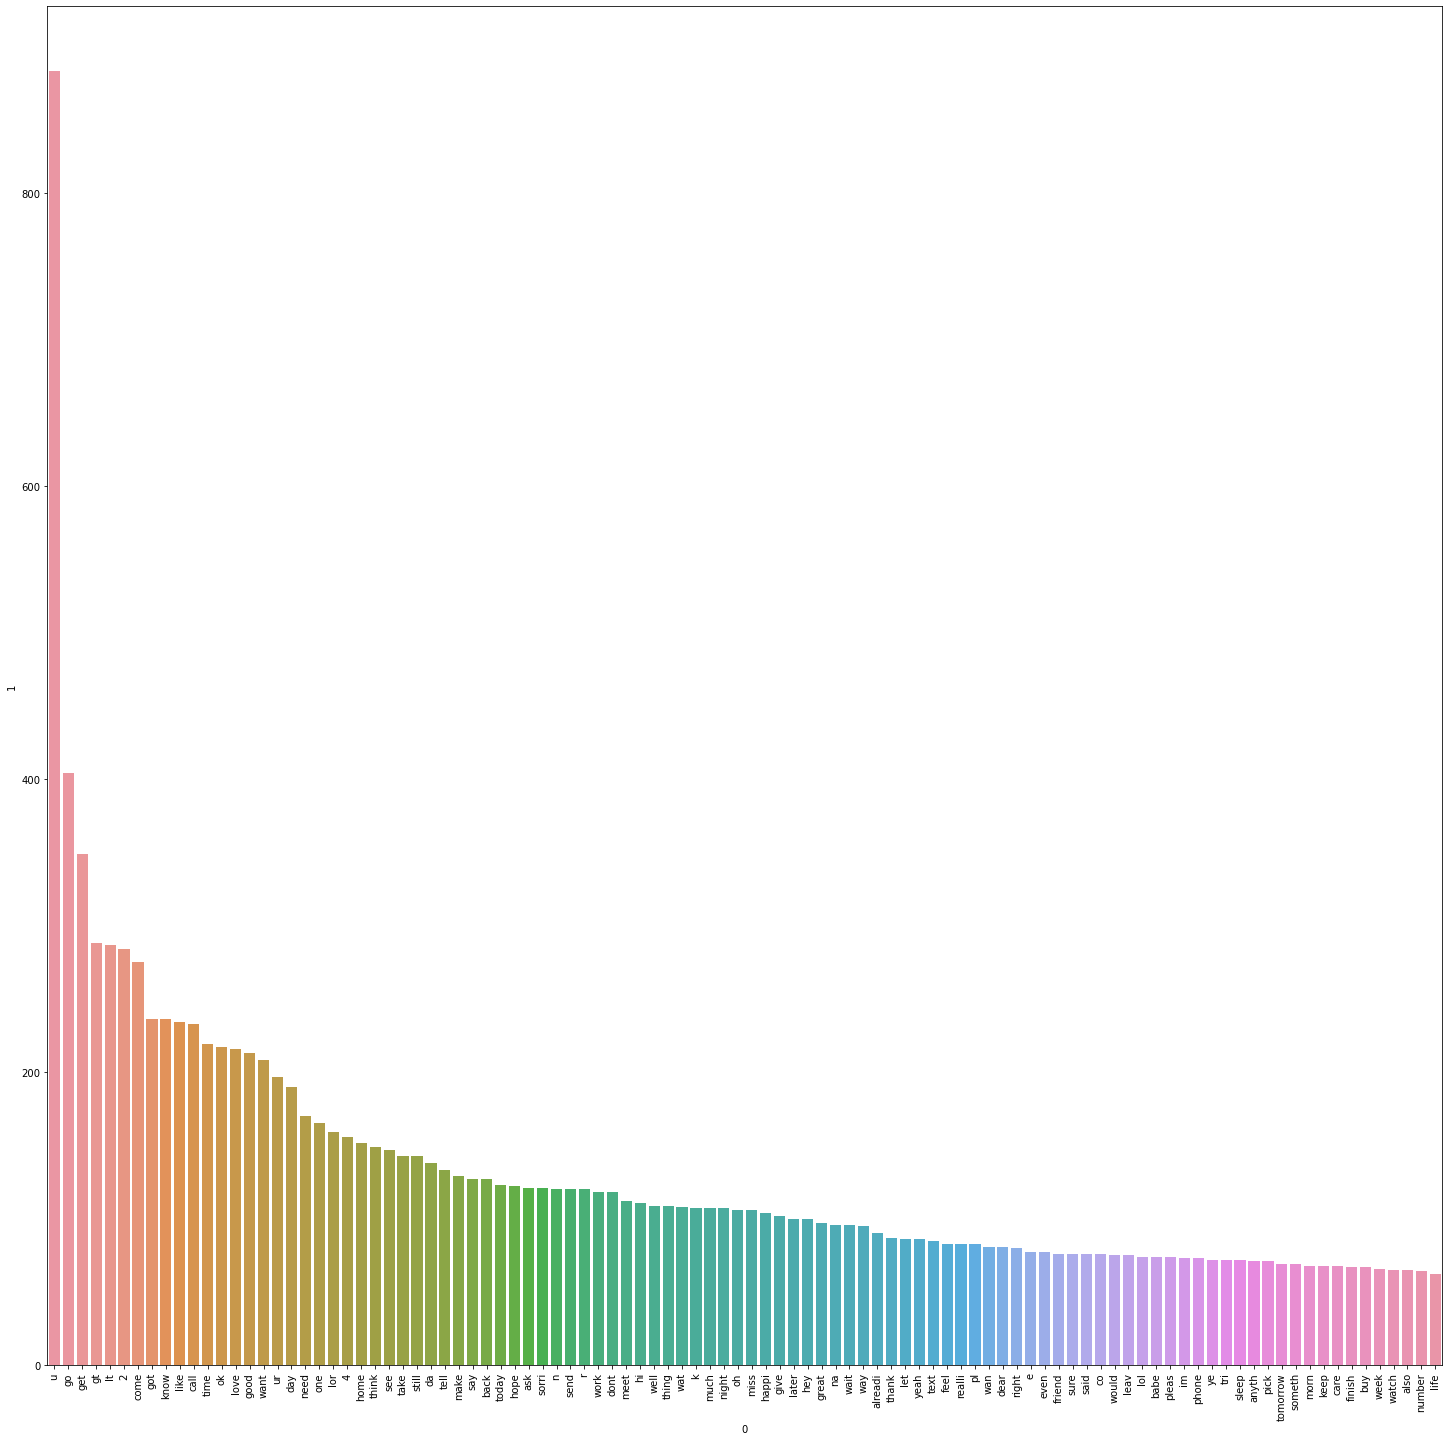

In [64]:
plt.figure(figsize=(25,25))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(100))[0],pd.DataFrame(Counter(ham_corpus).most_common(100))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [112]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [113]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [115]:
X=tfidf.fit_transform(data.transformed_text).toarray()

In [116]:
X.shape

(5169, 3000)

In [117]:
y=data.target.values

In [71]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [74]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [75]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [119]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [77]:
# will select above model as the precision score is best
# precision is the important measure for email spam classifier

In [78]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [79]:
# selected
# tfidf -> mnb(x_train,y_train)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [83]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [84]:
train_classifier(svc,x_train,y_train,x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [85]:
train_classifier(rfc,x_train,y_train,x_test,y_test)

(0.9680851063829787, 0.981651376146789)

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9274661508704062
Precision -  0.7739130434782608
For  NB
Accuracy -  0.9410058027079303
Precision -  1.0
For  DT
Accuracy -  0.9448742746615088
Precision -  0.8785046728971962
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9622641509433962
For  RF
Accuracy -  0.9680851063829787
Precision -  0.981651376146789
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9426229508196722


In [87]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [88]:
performance_data

,Algorithm,Accuracy,Precision
2,NB,0.941006,1.000000
5,RF,0.968085,0.981651
8,ETC,0.980658,0.975806
4,LR,0.961315,0.962264
10,xgb,0.970986,0.942623
6,AdaBoost,0.964217,0.931624
9,GBDT,0.951644,0.931373
7,BgC,0.966151,0.899225
3,DT,0.944874,0.878505
1,KN,0.927466,0.773913


In [89]:
performance_data1 = pd.melt(performance_data, id_vars = "Algorithm")

In [90]:
performance_data1

,Algorithm,variable,value
0,NB,Accuracy,0.941006
1,RF,Accuracy,0.968085
2,ETC,Accuracy,0.980658
3,LR,Accuracy,0.961315
4,xgb,Accuracy,0.970986
5,AdaBoost,Accuracy,0.964217
6,GBDT,Accuracy,0.951644
7,BgC,Accuracy,0.966151
8,DT,Accuracy,0.944874
9,KN,Accuracy,0.927466


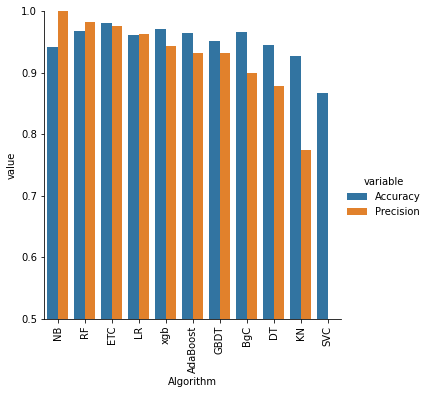

In [91]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_data1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [92]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [95]:
new_df = performance_data.merge(temp_df,on='Algorithm')


In [96]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [98]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000
1,RF,0.968085,0.981651,0.968085,0.981651,0.968085,0.981651,0.968085,0.981651
2,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
3,LR,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264
4,xgb,0.970986,0.942623,0.970986,0.942623,0.970986,0.942623,0.970986,0.942623
5,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
6,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
7,BgC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225
8,DT,0.944874,0.878505,0.944874,0.878505,0.944874,0.878505,0.944874,0.878505
9,KN,0.927466,0.773913,0.927466,0.773913,0.927466,0.773913,0.927466,0.773913


In [99]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [101]:
voting.fit(x_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:

y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [103]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [104]:

from sklearn.ensemble import StackingClassifier

In [105]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [106]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.952755905511811


In [120]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))